**Understanding industry classifications**

1. we must first understand what industry classification is best to use and the nuances between each one.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set paths here C:\Users\clint\Desktop\compstak-ra\src\exploration_1.ipynb
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-leases-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-sales-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\cb_2018_us_state_5m\cb_2018_us_state_5m.shp
path = 'C:/Users/clint/Desktop/data/data/'
# Update the shapefile path to the correct location
shapefile_path = 'C:/Users/clint/Desktop/data/data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp'

# Load the data
sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')

C:\Users\clint\AppData\Local\Temp\ipykernel_11784\1621790509.py:14: DtypeWarning:

Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\clint\AppData\Local\Temp\ipykernel_11784\1621790509.py:15: DtypeWarning:

Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\clint\AppData\Local\Temp\ipykernel_11784\1621790509.py:15: DtypeWarning:

Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.



# Investigating Property ID and State Consistency
We will analyze whether a `Property Id` always corresponds to the same `State` in both the sales and leases datasets.

In [34]:
# Check if Property Id always corresponds to the same State in sales data
sales_property_state_consistency = sales.groupby('Property Id')['State'].nunique()
sales_inconsistent_properties = sales_property_state_consistency[sales_property_state_consistency > 1]
if sales_inconsistent_properties.empty:
    print('All Property Ids in sales data are consistent with a single State.')
else:
    print('Inconsistent Property Ids in sales data found:', sales_inconsistent_properties)

# Check if Property Id always corresponds to the same State in leases data
leases_property_state_consistency = leases.groupby('Property Id')['State'].nunique()
leases_inconsistent_properties = leases_property_state_consistency[leases_property_state_consistency > 1]
if leases_inconsistent_properties.empty:
    print('All Property Ids in leases data are consistent with a single State.')
else:
    print('Inconsistent Property Ids in leases data found:', leases_inconsistent_properties)

All Property Ids in sales data are consistent with a single State.
All Property Ids in leases data are consistent with a single State.


In [35]:
# Combine sales and leases data
sales['Source'] = 'Sales'
leases['Source'] = 'Leases'
combined_data = pd.concat([sales, leases], ignore_index=True)

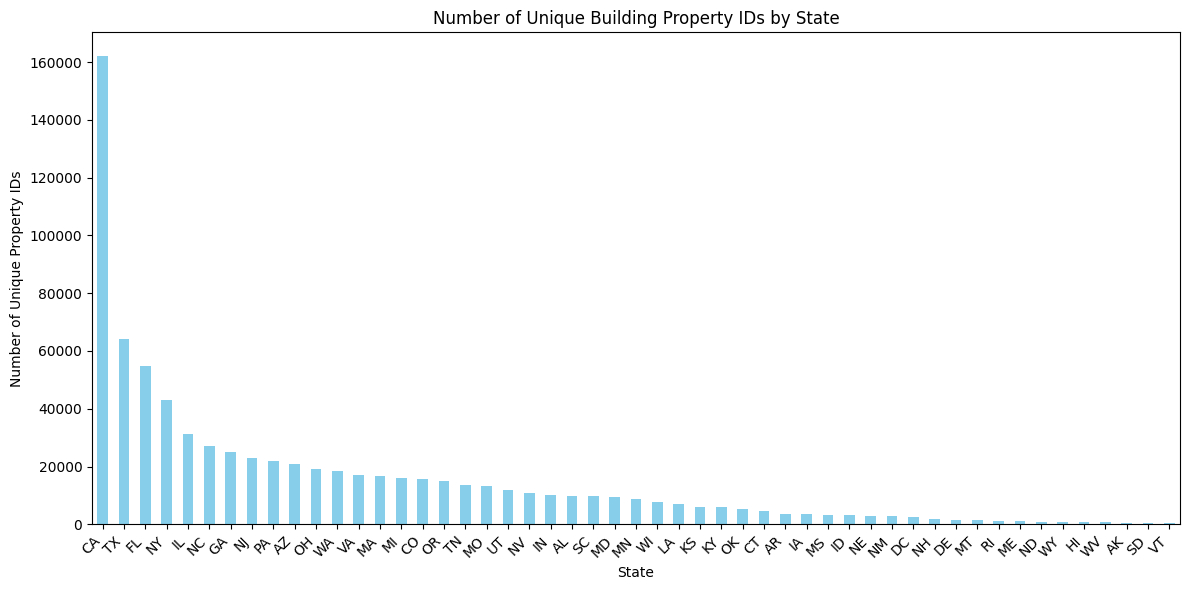

In [36]:
# Calculate the number of unique building property IDs for each state
state_unique_property_counts = combined_data.groupby('State')['Property Id'].nunique()

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
state_unique_property_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Unique Building Property IDs by State')
plt.xlabel('State')
plt.ylabel('Number of Unique Property IDs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

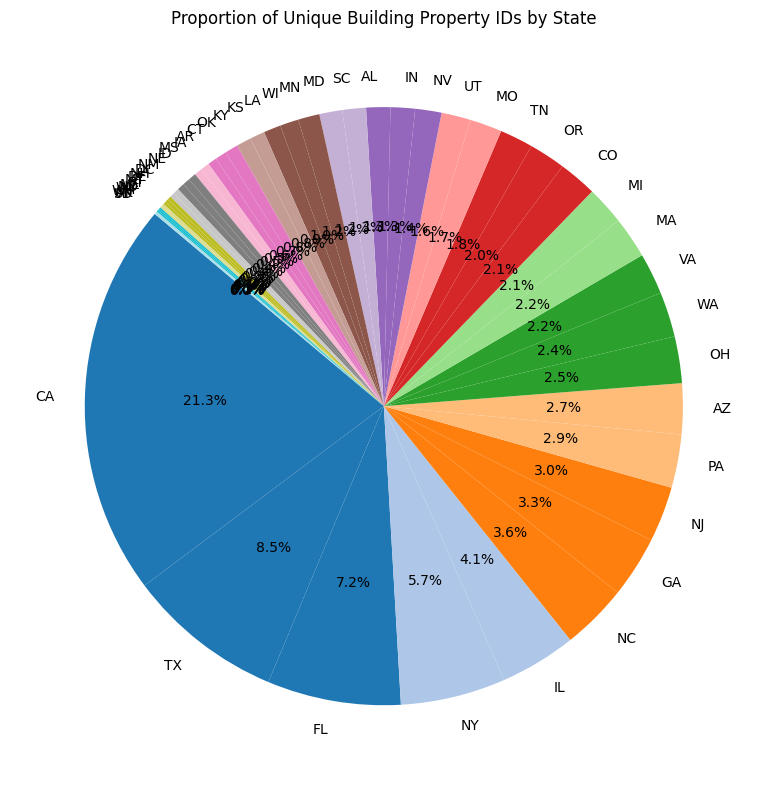

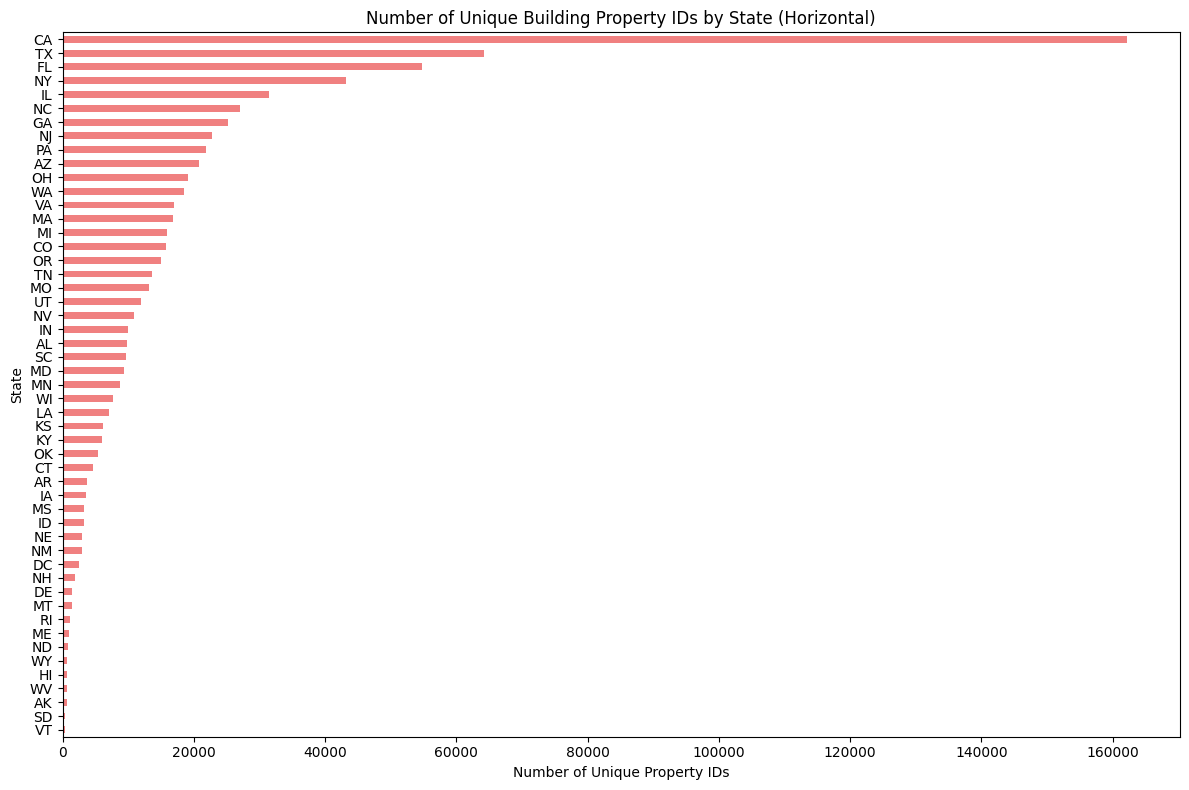

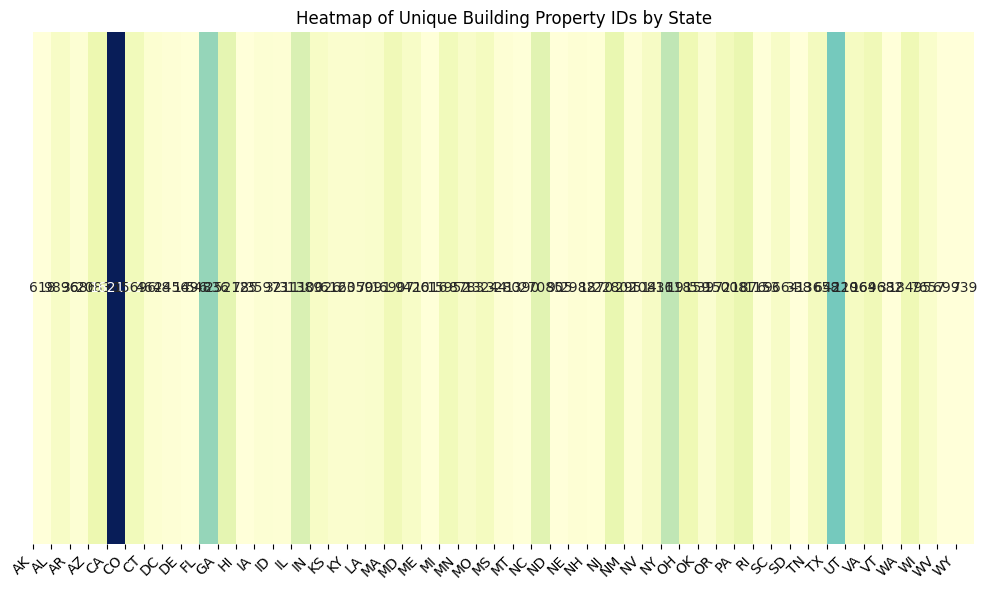

In [37]:
# Additional visualizations for unique building property IDs by state
import seaborn as sns

# Pie chart
plt.figure(figsize=(8, 8))
state_unique_property_counts.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Proportion of Unique Building Property IDs by State')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Horizontal bar chart
plt.figure(figsize=(12, 8))
state_unique_property_counts.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Number of Unique Building Property IDs by State (Horizontal)')
plt.xlabel('Number of Unique Property IDs')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Heatmap (if applicable, e.g., if states are grouped by regions)
state_data = state_unique_property_counts.reset_index()
state_data.columns = ['State', 'Unique Property Count']
plt.figure(figsize=(10, 6))
sns.heatmap(state_data[['Unique Property Count']].T, annot=state_data[['Unique Property Count']].T, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Heatmap of Unique Building Property IDs by State')
plt.yticks([])
plt.xticks(ticks=range(len(state_data['State'])), labels=state_data['State'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Geographic Distribution of Properties by State

Let's create a choropleth map of the United States to visualize the distribution of properties across different states. States with more properties will be displayed in darker colors.

TypeError: annotate() missing 1 required positional argument: 'text'

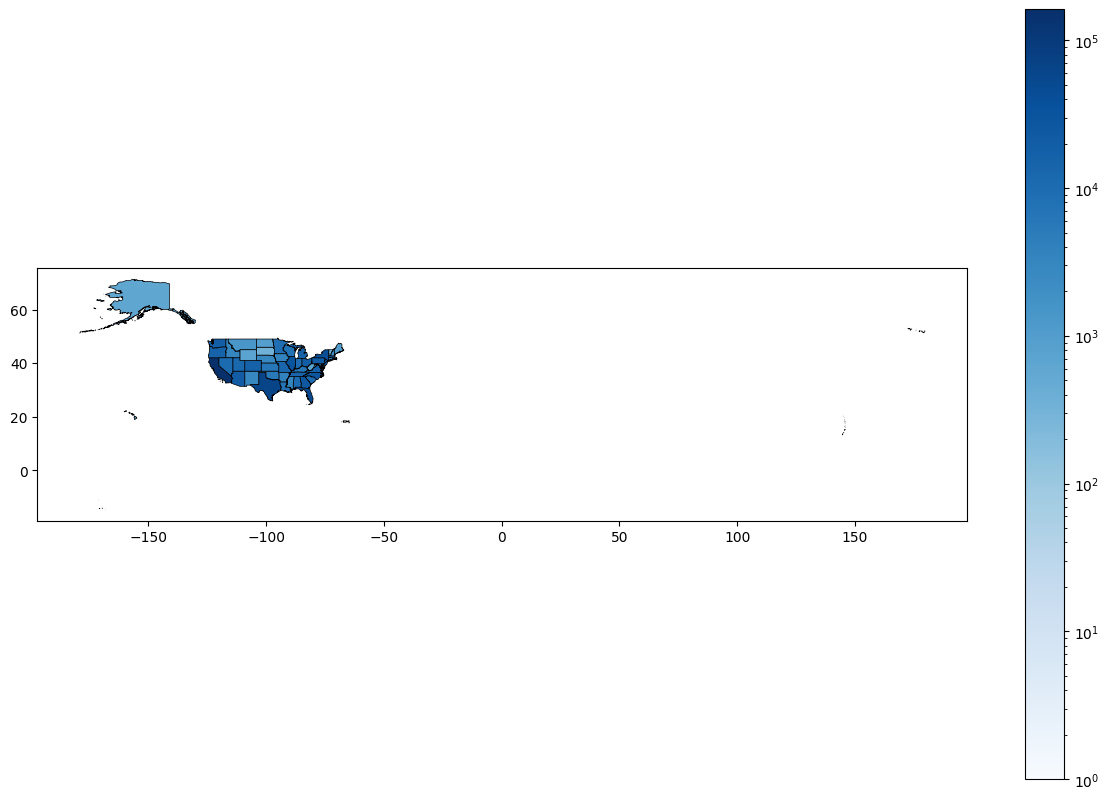

In [38]:
# Create a US map with state boundaries and color by property count
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# Load US states shapefile
us_states = gpd.read_file(shapefile_path)

# Convert state_unique_property_counts to a DataFrame for merging
state_counts_df = state_unique_property_counts.reset_index()
state_counts_df.columns = ['STATE_ABBR', 'Property_Count']

# Merge property counts with the US states geodataframe
us_states_with_counts = us_states.merge(state_counts_df, left_on='STUSPS', right_on='STATE_ABBR', how='left')
us_states_with_counts['Property_Count'] = us_states_with_counts['Property_Count'].fillna(0)

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Use a log scale for better visualization since the data ranges widely
vmin = us_states_with_counts['Property_Count'].min()
vmax = us_states_with_counts['Property_Count'].max()
norm = colors.LogNorm(vmin=max(1, vmin), vmax=vmax)

# Plot the map
us_states_with_counts.plot(column='Property_Count', 
                         ax=ax,
                         legend=True,
                         cmap='Blues',
                         norm=norm,
                         edgecolor='black',
                         linewidth=0.5)

# Add state abbreviations for identification
for idx, row in us_states_with_counts.iterrows():
    if row['Property_Count'] > 0:  # Only label states with properties
        plt.annotate(s=row['STUSPS'],
                    xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    ha='center', va='center',
                    fontsize=8)

# Customize the plot
plt.title('Property Count by State (Logarithmic Scale)', fontsize=16)
plt.axis('off')  # Turn off axis

# Add a colorbar with a better format
from matplotlib.ticker import ScalarFormatter
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, format=ScalarFormatter())
cbar.set_label('Number of Properties')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('C:/Users/clint/Desktop/compstak-ra/Images/us_property_count_map.png', dpi=300, bbox_inches='tight')

In [39]:
# Create an interactive version with Plotly for better visualization
import plotly.express as px

# Convert the geodataframe to a format that plotly can use
# Create a simplified dataframe with just the state abbreviations and counts
plotly_data = state_unique_property_counts.reset_index()
plotly_data.columns = ['state', 'count']

# Create the choropleth map using Plotly
fig = px.choropleth(
    plotly_data,
    locations='state',  # Column with state abbreviations
    locationmode='USA-states',  # Set of locations
    color='count',  # Column with property counts
    color_continuous_scale='Blues',  # Color scale
    scope='usa',  # Limit map to USA
    labels={'count': 'Number of Properties'},  # Label for colorbar
    title='Number of Properties by State',
    hover_data=['state', 'count']  # Data to show on hover
)

# Customize the layout
fig.update_layout(
    title_x=0.5,
    geo=dict(
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    ),
    coloraxis_colorbar=dict(
        title='Number of Properties',
        tickprefix='',
        ticksuffix=''
    ),
    height=600,
    width=900
)

# Save the interactive map to HTML
fig.write_html('C:/Users/clint/Desktop/compstak-ra/Images/plots/us_property_count_interactive_map.html')

# Display the interactive map
fig.show()

# Property Distribution Analysis

Now let's perform a deeper analysis of the property distribution across states:

In [40]:
# Calculate statistical metrics on property distribution
total_properties = state_unique_property_counts.sum()
top_5_states = state_unique_property_counts.sort_values(ascending=False).head(5)
bottom_5_states = state_unique_property_counts.sort_values().head(5)
median_properties = state_unique_property_counts.median()

# Print summary statistics
print(f"Total unique properties across all states: {total_properties:,}")
print(f"Median number of properties per state: {median_properties:,.0f}")
print("\nTop 5 states by property count:")
for state, count in top_5_states.items():
    print(f"{state}: {count:,} properties ({count/total_properties*100:.1f}% of total)")

print("\nBottom 5 states by property count:")
for state, count in bottom_5_states.items():
    print(f"{state}: {count:,} properties ({count/total_properties*100:.2f}% of total)")

# Calculate concentration metrics
top_5_percent = top_5_states.sum() / total_properties * 100
top_10_states = state_unique_property_counts.sort_values(ascending=False).head(10)
top_10_percent = top_10_states.sum() / total_properties * 100

print(f"\nThe top 5 states account for {top_5_percent:.1f}% of all properties")
print(f"The top 10 states account for {top_10_percent:.1f}% of all properties")

Total unique properties across all states: 759,623
Median number of properties per state: 8,783

Top 5 states by property count:
CA: 162,162 properties (21.3% of total)
TX: 64,220 properties (8.5% of total)
FL: 54,836 properties (7.2% of total)
NY: 43,118 properties (5.7% of total)
IL: 31,389 properties (4.1% of total)

Bottom 5 states by property count:
VT: 332 properties (0.04% of total)
SD: 338 properties (0.04% of total)
AK: 618 properties (0.08% of total)
WV: 699 properties (0.09% of total)
HI: 725 properties (0.10% of total)

The top 5 states account for 46.8% of all properties
The top 10 states account for 62.3% of all properties


# CompStak Coverage Analysis

Let's analyze how much of the entire US commercial property market is covered by the CompStak dataset, and whether that coverage is consistent across states.

In [41]:
# Create a dictionary with the entire US commercial property dataset
us_commercial_properties = {
    'CA': 917860, 'TX': 733648, 'FL': 735652, 'NY': 536608, 'IL': 519616,
    'PA': 438648, 'OH': 407557, 'GA': 444143, 'NC': 313187, 'MI': 369983,
    'WA': 246208, 'AZ': 272797, 'MA': 371710, 'VA': 267936, 'CO': 224418,
    'IN': 428138, 'TN': 270544, 'MO': 192733, 'WI': 190274, 'MN': 160773,
    'AL': 323716, 'SC': 189736, 'KY': 76415, 'OR': 145157, 'OK': 144752,
    'CT': 138387, 'IA': 81338, 'MS': 131969, 'AR': 122634, 'KS': 90904,
    'NV': 113336, 'UT': 102769, 'NM': 57693, 'NE': 55961, 'WV': 54143,
    'ID': 41460, 'HI': 26275, 'ME': 73831, 'NH': 60537, 'RI': 48317,
    'MT': 43219, 'DE': 36816, 'SD': 34215, 'ND': 32846, 'AK': 22410,
    'VT': 21740, 'WY': 20549, 'DC': 35878
}

# Convert to DataFrame for easier manipulation
us_properties_df = pd.DataFrame(list(us_commercial_properties.items()), columns=['State', 'Total_Properties'])

# Convert CompStak data to DataFrame and ensure states are in the same format
compstak_properties = state_unique_property_counts.reset_index()
compstak_properties.columns = ['State', 'CompStak_Properties']

# Merge the two datasets
coverage_df = pd.merge(us_properties_df, compstak_properties, on='State', how='left')
coverage_df['CompStak_Properties'] = coverage_df['CompStak_Properties'].fillna(0)

# Calculate coverage percentage
coverage_df['Coverage_Percent'] = (coverage_df['CompStak_Properties'] / coverage_df['Total_Properties']) * 100

# Sort by coverage percentage to see which states have the best coverage
coverage_df = coverage_df.sort_values('Coverage_Percent', ascending=False)

# Display the top and bottom 5 states by coverage
print("Top 5 states by CompStak coverage:")
print(coverage_df.head(5))

print("\nBottom 5 states with some CompStak coverage:")
non_zero_coverage = coverage_df[coverage_df['CompStak_Properties'] > 0].tail(5)
print(non_zero_coverage)

print("\nStates with no CompStak coverage:")
zero_coverage = coverage_df[coverage_df['CompStak_Properties'] == 0]
print(f"Number of states with zero coverage: {len(zero_coverage)}")
print(list(zero_coverage['State']))

Top 5 states by CompStak coverage:
   State  Total_Properties  CompStak_Properties  Coverage_Percent
0     CA            917860               162162         17.667400
31    UT            102769                11964         11.641643
23    OR            145157                15008         10.339150
30    NV            113336                10816          9.543305
1     TX            733648                64220          8.753517

Bottom 5 states with some CompStak coverage:
   State  Total_Properties  CompStak_Properties  Coverage_Percent
15    IN            428138                10026          2.341768
45    VT             21740                  332          1.527139
37    ME             73831                 1016          1.376116
34    WV             54143                  699          1.291026
42    SD             34215                  338          0.987871

States with no CompStak coverage:
Number of states with zero coverage: 0
[]


C:\Users\clint\AppData\Local\Temp\ipykernel_11784\2921736048.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




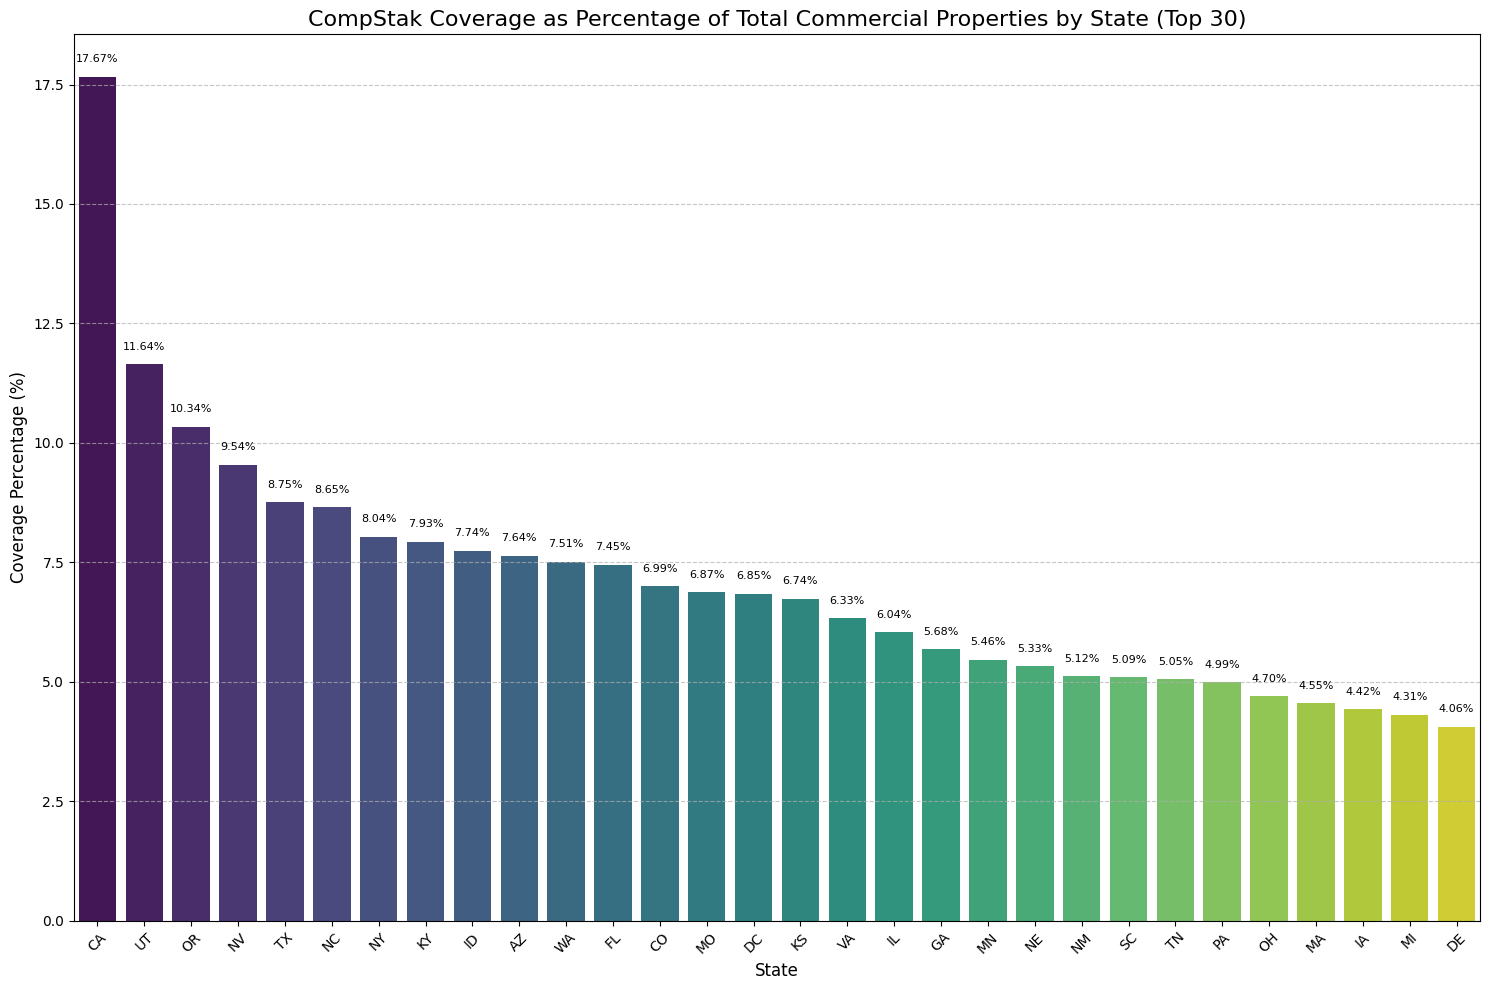

In [42]:
# Create bar chart showing coverage percentages
plt.figure(figsize=(15, 10))
# Get top 30 states by coverage for readability
top_30_coverage = coverage_df.head(30)
sns.barplot(x='State', y='Coverage_Percent', data=top_30_coverage, palette='viridis')
plt.title('CompStak Coverage as Percentage of Total Commercial Properties by State (Top 30)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Coverage Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(top_30_coverage['Coverage_Percent']):
    plt.text(i, v + 0.3, f"{v:.2f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/compstak_coverage_percentage.png', dpi=300, bbox_inches='tight')
plt.show()

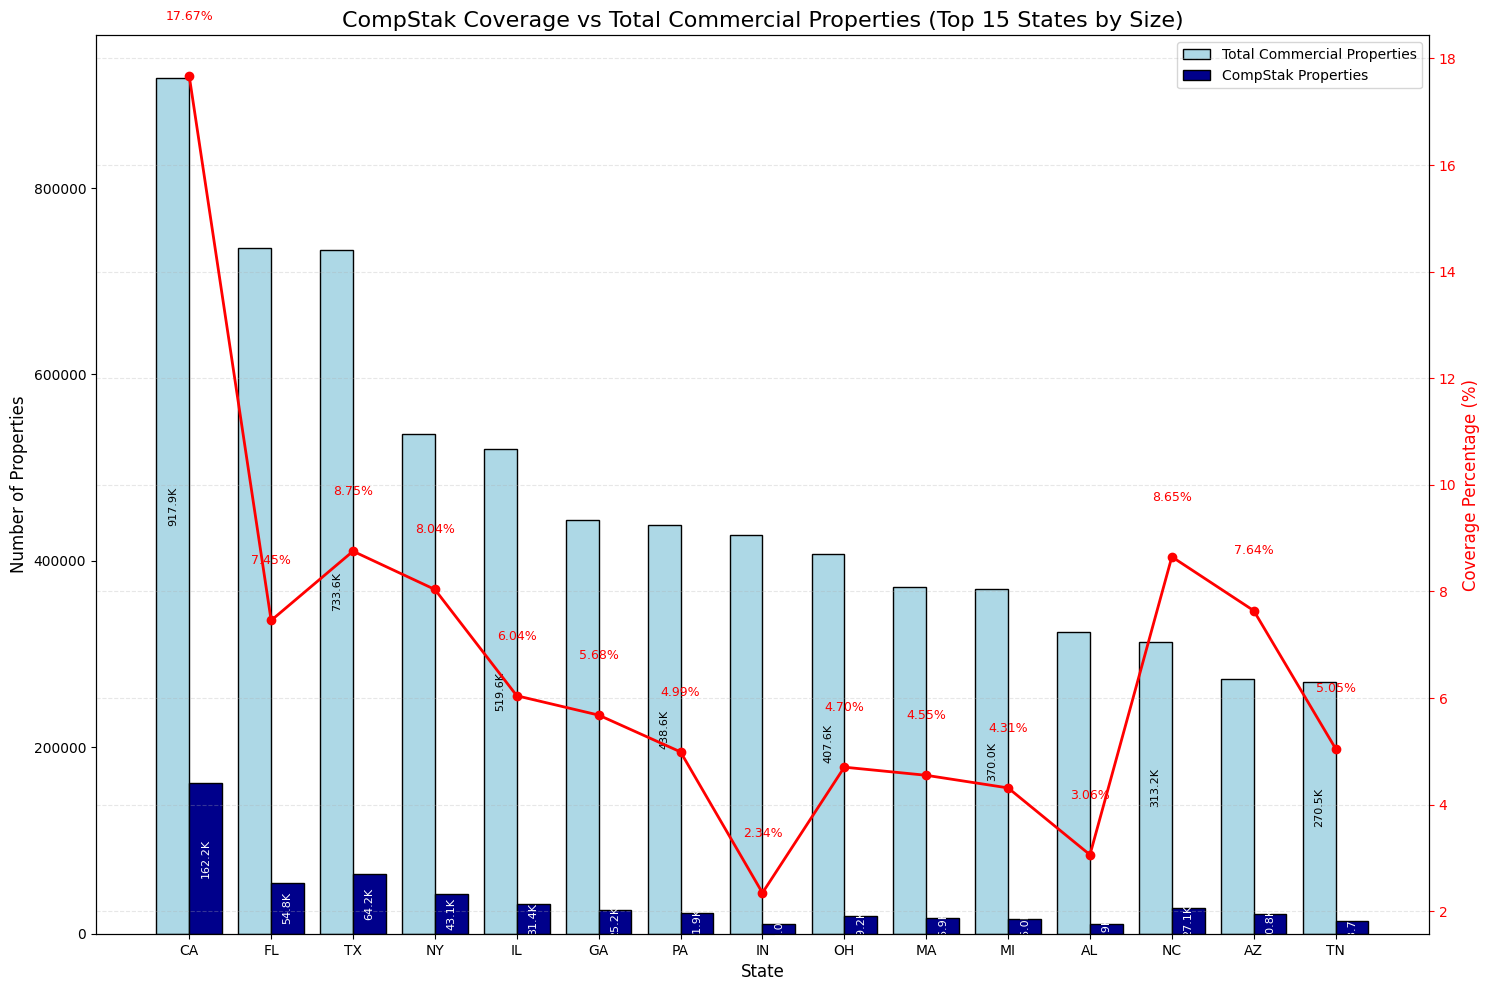

In [43]:
# Create a side-by-side bar chart comparing CompStak properties to total properties (for selected states)
# Select top 15 states by total properties for comparison
top_15_states = us_properties_df.sort_values('Total_Properties', ascending=False).head(15)
top_states_list = top_15_states['State'].tolist()

# Filter the coverage dataframe to include only these states
top_states_comparison = coverage_df[coverage_df['State'].isin(top_states_list)].copy()
top_states_comparison = top_states_comparison.sort_values('Total_Properties', ascending=False)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Set width of bars
bar_width = 0.4
x = np.arange(len(top_states_comparison))

# Plot bars
total_bars = ax.bar(x - bar_width/2, top_states_comparison['Total_Properties'], bar_width, label='Total Commercial Properties', color='lightblue', edgecolor='black')
compstak_bars = ax.bar(x + bar_width/2, top_states_comparison['CompStak_Properties'], bar_width, label='CompStak Properties', color='darkblue', edgecolor='black')

# Customize the plot
ax.set_title('CompStak Coverage vs Total Commercial Properties (Top 15 States by Size)', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Properties', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_states_comparison['State'])
ax.legend()

# Add a second y-axis for coverage percentage
ax2 = ax.twinx()
ax2.plot(x, top_states_comparison['Coverage_Percent'], 'ro-', linewidth=2)
ax2.set_ylabel('Coverage Percentage (%)', color='r', fontsize=12)
ax2.tick_params(axis='y', colors='r')

# Add percentage labels above line plot
for i, v in enumerate(top_states_comparison['Coverage_Percent']):
    ax2.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', color='red', fontsize=9)

# Add annotations showing the number of properties
def format_number(num):
    if num >= 1000000:
        return f"{num/1000000:.1f}M"
    elif num >= 1000:
        return f"{num/1000:.1f}K"
    else:
        return f"{num:.0f}"

# Add number labels for selected bars (to avoid overcrowding)
for i, bar in enumerate(total_bars):
    height = bar.get_height()
    if i % 2 == 0:  # Only label every other bar to avoid overcrowding
        ax.text(bar.get_x() + bar.get_width()/2, height * 0.5, format_number(height),
                ha='center', va='center', color='black', fontsize=8, rotation=90)

for i, bar in enumerate(compstak_bars):
    height = bar.get_height()
    if height > 5000:  # Only label bars with significant values
        ax.text(bar.get_x() + bar.get_width()/2, height * 0.5, format_number(height),
                ha='center', va='center', color='white', fontsize=8, rotation=90)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/compstak_vs_total_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

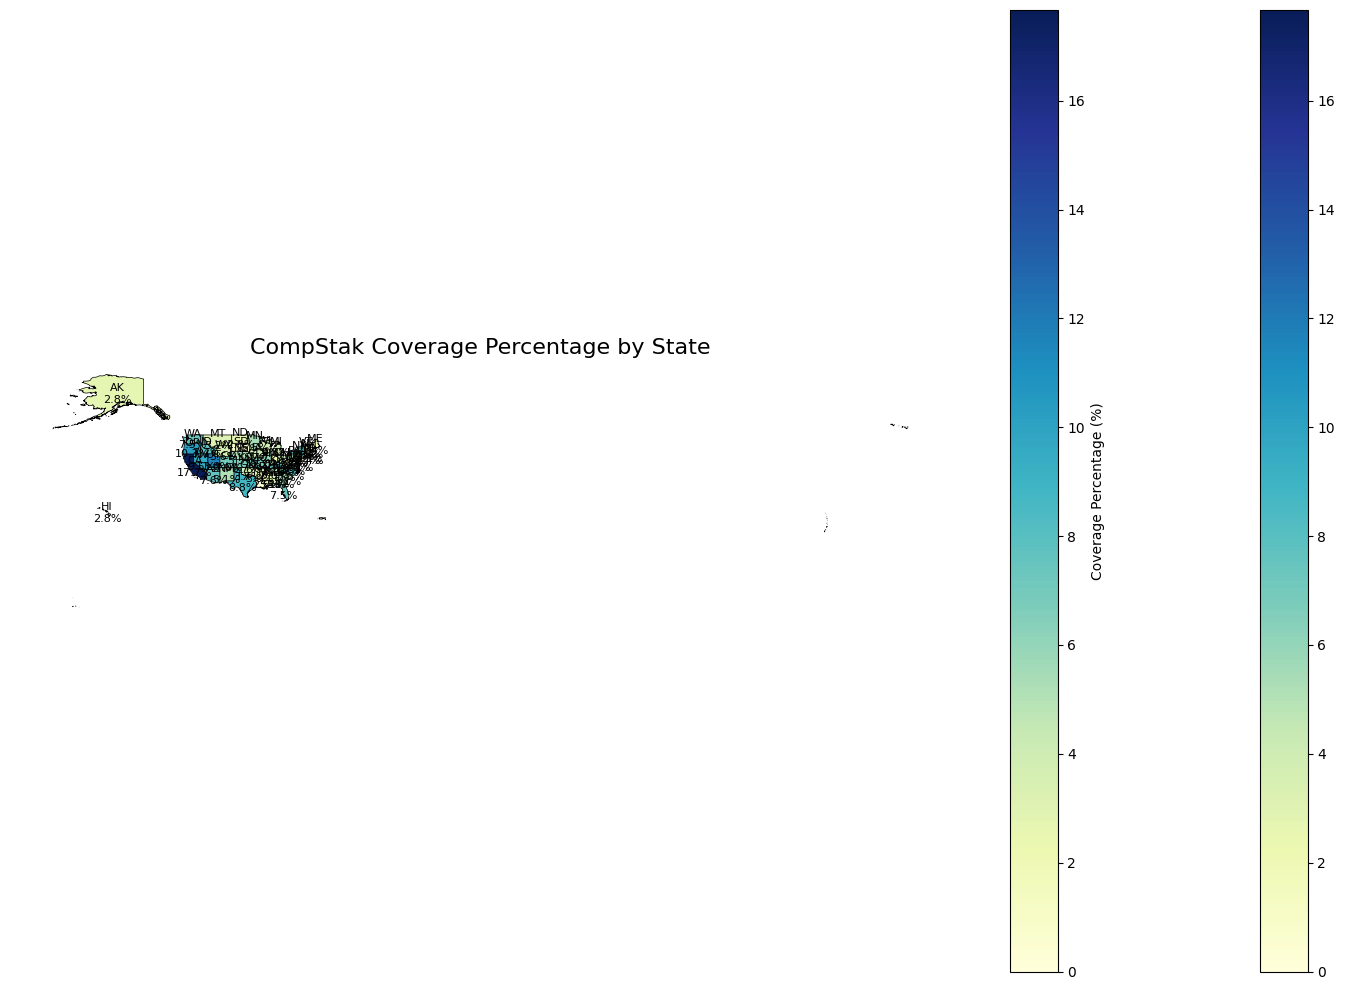

In [47]:
# Create a choropleth map showing the coverage percentage by state
import geopandas as gpd

# Load the US states shapefile
us_states = gpd.read_file(shapefile_path)

# Prepare the data for mapping
coverage_geo_df = coverage_df.copy()
coverage_geo_df.columns = ['STATE_ABBR', 'Total_Properties', 'CompStak_Properties', 'Coverage_Percent']

# Merge with the shapefile
us_states_coverage = us_states.merge(coverage_geo_df, left_on='STUSPS', right_on='STATE_ABBR', how='left')
us_states_coverage['Coverage_Percent'] = us_states_coverage['Coverage_Percent'].fillna(0)

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with coverage percentage
us_states_coverage.plot(column='Coverage_Percent', 
                       ax=ax,
                       legend=True,
                       cmap='YlGnBu',  # Yellow-Green-Blue color map
                       edgecolor='black',
                       linewidth=0.5)

# Add state abbreviations with coverage percentage
for idx, row in us_states_coverage.iterrows():
    if row['Coverage_Percent'] > 0.05:  # Only label states with some coverage
        plt.annotate(text=f"{row['STUSPS']}\n{row['Coverage_Percent']:.1f}%",
                    xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    ha='center', va='center',
                    fontsize=8)

# Customize the plot
plt.title('CompStak Coverage Percentage by State', fontsize=16)
plt.axis('off')  # Turn off axis

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='YlGnBu')
sm.set_array(us_states_coverage['Coverage_Percent'])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Coverage Percentage (%)')

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_map.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Create an interactive version of coverage percentage map with Plotly
import plotly.express as px

# Prepare the data for Plotly
plotly_coverage_data = coverage_df.copy()

# Create the choropleth map using Plotly with blue-to-red color scale
fig = px.choropleth(
    plotly_coverage_data,
    locations='State',  # Column with state abbreviations
    locationmode='USA-states',  # Set of locations
    color='Coverage_Percent',  # Column with coverage percentages
    color_continuous_scale='Blues_r',  # Blue (low) to White (middle) color scale
    range_color=[0, plotly_coverage_data['Coverage_Percent'].max() * 1.1],  # Range from 0 to slightly above max
    scope='usa',  # Limit map to USA
    labels={'Coverage_Percent': 'Coverage Percentage (%)'},  # Label for colorbar
    title='CompStak Coverage Percentage by State',
    hover_data={
        'State': True,
        'CompStak_Properties': True,
        'Total_Properties': True,
        'Coverage_Percent': ':.2f%'
    }  # Data to show on hover with formatting
)

# Create a second version with blue-to-red color scale
fig_red = px.choropleth(
    plotly_coverage_data,
    locations='State',  # Column with state abbreviations
    locationmode='USA-states',  # Set of locations
    color='Coverage_Percent',  # Column with coverage percentages
    color_continuous_scale='RdBu_r',  # Red (high) to Blue (low) color scale
    range_color=[0, plotly_coverage_data['Coverage_Percent'].max() * 1.1],  # Range from 0 to slightly above max
    scope='usa',  # Limit map to USA
    labels={'Coverage_Percent': 'Coverage Percentage (%)'},  # Label for colorbar
    title='CompStak Coverage Percentage by State (Red=High, Blue=Low)',
    hover_data={
        'State': True,
        'CompStak_Properties': True,
        'Total_Properties': True,
        'Coverage_Percent': ':.2f%'
    }  # Data to show on hover with formatting
)

# Customize the layout for both maps
for map_fig in [fig, fig_red]:
    map_fig.update_layout(
        title_x=0.5,
        geo=dict(
            showlakes=True,
            lakecolor='rgb(255, 255, 255)'
        ),
        coloraxis_colorbar=dict(
            title='Coverage Percentage',
            ticksuffix='%'
        ),
        height=600,
        width=900
    )

    # Add annotations for states with high coverage
    for i, row in plotly_coverage_data.iterrows():
        if row['Coverage_Percent'] > 1.0:  # Only annotate states with coverage > 1%
            map_fig.add_annotation(
                x=row['State'],
                text=f"{row['State']}<br>{row['Coverage_Percent']:.1f}%",
                showarrow=False,
                font=dict(color='black', size=8)
            )

# Save the interactive maps to HTML with timestamp
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save blue version
html_file = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_blue_{timestamp}.html'
fig.write_html(html_file)

# Save red-blue version
html_file_red = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_redblue_{timestamp}.html'
fig_red.write_html(html_file_red)

# Save static images for both versions
try:
    # Save as PNG
    png_file = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_blue_{timestamp}.png'
    fig.write_image(png_file)
    
    png_file_red = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_redblue_{timestamp}.png'
    fig_red.write_image(png_file_red)
    
    # Save as JPG
    jpg_file = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_blue_{timestamp}.jpg'
    fig.write_image(jpg_file)
    
    jpg_file_red = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_percentage_redblue_{timestamp}.jpg'
    fig_red.write_image(jpg_file_red)
    
    print(f"Interactive maps saved to HTML files")
    print(f"Static images saved as PNG and JPG")
except Exception as e:
    print(f"Error saving static images: {e}")
    print("You may need to install kaleido: pip install -U kaleido")

# Display the blue-to-red interactive map
fig_red.show()

Interactive maps saved to HTML files
Static images saved as PNG and JPG


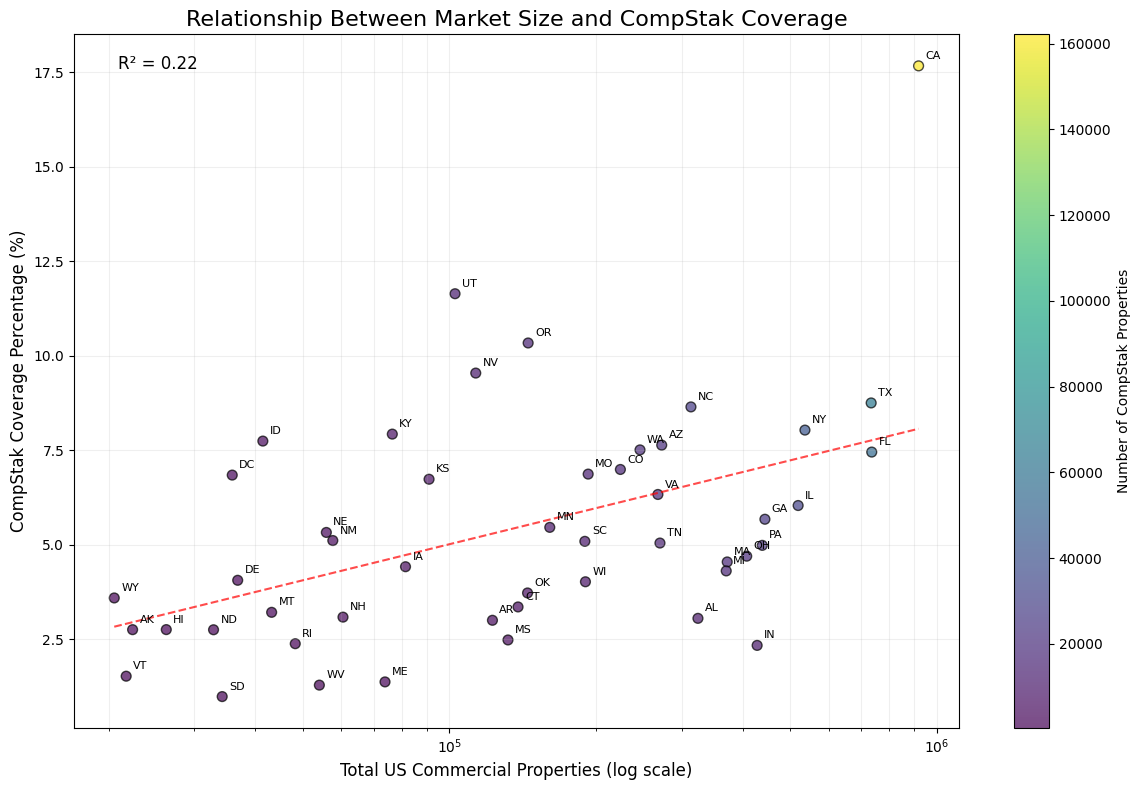

In [52]:
# Create a scatter plot to analyze if coverage is related to market size
plt.figure(figsize=(12, 8))

# Add log scale for better visualization
plt.scatter(coverage_df['Total_Properties'], 
           coverage_df['Coverage_Percent'], 
           s=50, alpha=0.7, c=coverage_df['CompStak_Properties'], 
           cmap='viridis', edgecolor='black')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add state labels for reference
for i, row in coverage_df.iterrows():
    if row['Coverage_Percent'] > 0.5 or row['Total_Properties'] > 500000:  # Only label significant states
        plt.annotate(row['State'], 
                    (row['Total_Properties'], row['Coverage_Percent']), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8)

plt.colorbar(label='Number of CompStak Properties')
plt.title('Relationship Between Market Size and CompStak Coverage', fontsize=16)
plt.xlabel('Total US Commercial Properties (log scale)', fontsize=12)
plt.ylabel('CompStak Coverage Percentage (%)', fontsize=12)

# Add a trend line to see if there's a relationship
from scipy import stats
# Filter out zeros for trend line calculation
non_zero_df = coverage_df[coverage_df['Coverage_Percent'] > 0]
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(non_zero_df['Total_Properties']), 
                                                              non_zero_df['Coverage_Percent'])
x = np.array([min(non_zero_df['Total_Properties']), max(non_zero_df['Total_Properties'])])
y = intercept + slope * np.log10(x)
plt.plot(x, y, 'r--', alpha=0.7)

# Add annotation with R² value
plt.annotate(f"R² = {r_value**2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/market_size_vs_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary of CompStak Coverage

The analysis above shows how well the CompStak dataset represents the overall commercial property market in the United States. We can observe:

1. Overall coverage percentage across all states
2. Which states have the highest and lowest representation in CompStak
3. Whether there's a relationship between market size and coverage percentage
4. Geographic patterns in CompStak's coverage

This information helps us understand potential biases in any analyses performed using the CompStak dataset.

In [46]:
# Calculate overall coverage metrics
total_us_properties = coverage_df['Total_Properties'].sum()
total_compstak_properties = coverage_df['CompStak_Properties'].sum()
overall_coverage = (total_compstak_properties / total_us_properties) * 100

covered_states = len(coverage_df[coverage_df['CompStak_Properties'] > 0])
total_states = len(coverage_df)

print(f"Overall CompStak Coverage: {total_compstak_properties:,} out of {total_us_properties:,} commercial properties ({overall_coverage:.2f}%)")
print(f"States with some CompStak coverage: {covered_states} out of {total_states} states ({covered_states/total_states*100:.1f}%)")

# Calculate average coverage percentage for states with any coverage
avg_coverage = coverage_df[coverage_df['CompStak_Properties'] > 0]['Coverage_Percent'].mean()
median_coverage = coverage_df[coverage_df['CompStak_Properties'] > 0]['Coverage_Percent'].median()
std_coverage = coverage_df[coverage_df['CompStak_Properties'] > 0]['Coverage_Percent'].std()

print(f"\nFor states with some coverage:")
print(f"Average coverage percentage: {avg_coverage:.2f}%")
print(f"Median coverage percentage: {median_coverage:.2f}%")
print(f"Standard deviation: {std_coverage:.2f}%")

# Calculate Gini coefficient for coverage inequality
from scipy import stats
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(array, array)).mean()
    # Relative mean absolute difference
    rmad = mad / np.mean(array)
    # Gini coefficient
    g = 0.5 * rmad
    return g

# Calculate Gini coefficient for states with coverage
coverage_values = coverage_df[coverage_df['CompStak_Properties'] > 0]['Coverage_Percent'].values
gini_coefficient = gini(coverage_values)

print(f"\nGini coefficient for coverage inequality: {gini_coefficient:.3f}")
print(f"(0 = perfectly equal coverage across all states, 1 = complete inequality)")

Overall CompStak Coverage: 720,304 out of 10,369,436 commercial properties (6.95%)
States with some CompStak coverage: 48 out of 48 states (100.0%)

For states with some coverage:
Average coverage percentage: 5.40%
Median coverage percentage: 5.02%
Standard deviation: 3.09%

Gini coefficient for coverage inequality: 0.300
(0 = perfectly equal coverage across all states, 1 = complete inequality)


# Lorenz Curve for CompStak Coverage Distribution

To better visualize the inequality in CompStak coverage across states, let's create a Lorenz curve and calculate the Gini coefficient using the area method.

C:\Users\clint\AppData\Local\Temp\ipykernel_11784\3519902394.py:35: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.



Lorenz curve saved to: C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_lorenz_curve_20250425_011228.png


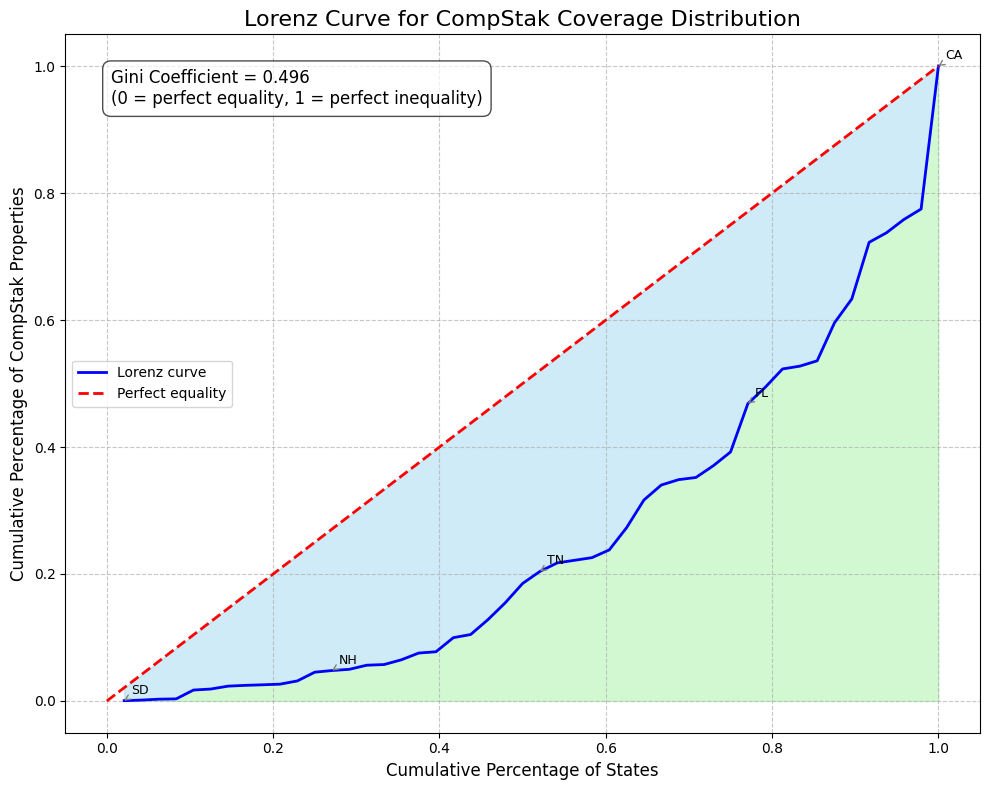

Gini coefficient (area method): 0.496
Gini coefficient (mean difference method): 0.300


In [50]:
# Create Lorenz Curve to visualize inequality in CompStak coverage
import matplotlib.pyplot as plt
import numpy as np

# Filter for states that have some CompStak coverage
non_zero_coverage_df = coverage_df[coverage_df['CompStak_Properties'] > 0].copy()

# Sort by coverage percentage (ascending)
non_zero_coverage_df = non_zero_coverage_df.sort_values('Coverage_Percent')

# Calculate cumulative percentage of states and coverage
n_states = len(non_zero_coverage_df)
x_states = np.arange(1, n_states + 1) / n_states  # Percentage of states (x-axis)

# Calculate weighted coverage using CompStak property counts
weights = non_zero_coverage_df['CompStak_Properties']
sorted_coverage = non_zero_coverage_df['Coverage_Percent']

# Calculate cumulative distribution (y-axis)
cum_weights = np.cumsum(weights)
y_coverage = cum_weights / cum_weights.iloc[-1]

# Create the Lorenz curve
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the Lorenz curve
ax.plot(x_states, y_coverage, 'b-', linewidth=2, label='Lorenz curve')

# Add perfect equality line (45-degree line)
ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect equality')

# Calculate Gini coefficient based on area
# Gini = A / (A + B) where A is area between equality line and Lorenz curve
# Using trapezoidal rule to approximate the area under the Lorenz curve
B = np.trapz(y_coverage, x_states)
A = 0.5 - B  # Area between Lorenz curve and line of equality (0.5 is area under line of equality)
gini_area = A / 0.5

# Customize the plot
ax.set_title('Lorenz Curve for CompStak Coverage Distribution', fontsize=16)
ax.set_xlabel('Cumulative Percentage of States', fontsize=12)
ax.set_ylabel('Cumulative Percentage of CompStak Properties', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Add text box with Gini coefficient
textstr = f'Gini Coefficient = {gini_area:.3f}\n(0 = perfect equality, 1 = perfect inequality)'
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Fill the area between the curves
ax.fill_between(x_states, y_coverage, x_states, color='skyblue', alpha=0.4, label='Area A')
ax.fill_between(x_states, y_coverage, 0, color='lightgreen', alpha=0.4, label='Area B')

# Add annotations for key points
for i, (x, y, state) in enumerate(zip(x_states, y_coverage, non_zero_coverage_df['State'])):
    # Add annotations for some key states (first, last, and some middle points)
    if i == 0 or i == len(x_states)-1 or i == len(x_states)//2 or i == len(x_states)//4 or i == 3*len(x_states)//4:
        ax.annotate(state, xy=(x, y), xytext=(5, 5), textcoords='offset points',
                   fontsize=9, arrowprops=dict(arrowstyle='->', color='gray'))

# Save the figure
plt.tight_layout()
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
lorenz_file = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_lorenz_curve_{timestamp}.png'
plt.savefig(lorenz_file, dpi=300, bbox_inches='tight')
print(f"Lorenz curve saved to: {lorenz_file}")

plt.show()

# Print comparison between different Gini calculation methods
print(f"Gini coefficient (area method): {gini_area:.3f}")
print(f"Gini coefficient (mean difference method): {gini_coefficient:.3f}")

In [51]:
# Create an interactive Lorenz curve with Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
# Lorenz curve
fig.add_trace(
    go.Scatter(
        x=x_states, 
        y=y_coverage,
        name="Lorenz curve",
        line=dict(color='blue', width=3)
    )
)

# Line of perfect equality
fig.add_trace(
    go.Scatter(
        x=[0, 1], 
        y=[0, 1],
        name="Perfect equality",
        line=dict(color='red', width=2, dash='dash')
    )
)

# Add fill for area between curves
fig.add_trace(
    go.Scatter(
        x=list(x_states) + list(x_states)[::-1],
        y=list(y_coverage) + list(x_states)[::-1],
        fill='toself',
        fillcolor='rgba(0, 100, 255, 0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name="Inequality area",
        showlegend=True
    )
)

# Add scatter points for states with hovertext
fig.add_trace(
    go.Scatter(
        x=x_states,
        y=y_coverage,
        mode='markers',
        marker=dict(size=8, color='darkblue', opacity=0.7),
        name='States',
        text=non_zero_coverage_df['State'],
        hovertemplate='%{text}<br>Coverage: %{customdata:.2f}%',
        customdata=non_zero_coverage_df['Coverage_Percent']
    )
)

# Update layout
fig.update_layout(
    title_text="Lorenz Curve for CompStak Coverage Distribution",
    title_x=0.5,
    xaxis_title="Cumulative Percentage of States",
    yaxis_title="Cumulative Percentage of CompStak Coverage",
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
    width=900,
    height=700,
    annotations=[dict(
        x=0.15,
        y=0.85,
        xref="paper",
        yref="paper",
        text=f"Gini Coefficient = {gini_area:.3f}<br>(0 = perfect equality, 1 = perfect inequality)",
        showarrow=False,
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4
    )]
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Save the interactive plot
interactive_lorenz = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_lorenz_interactive_{timestamp}.html'
fig.write_html(interactive_lorenz)

# Try to save as image too
try:
    interactive_lorenz_img = f'C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_lorenz_interactive_{timestamp}.png'
    fig.write_image(interactive_lorenz_img)
    print(f"Interactive Lorenz curve saved to: {interactive_lorenz_img}")
except Exception as e:
    print(f"Could not save image version of interactive plot: {e}")

# Show the plot
fig.show()

Interactive Lorenz curve saved to: C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_lorenz_interactive_20250425_011228.png
